<a href="https://colab.research.google.com/github/arjunaid98/gtd-eda/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns         
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/gtd/gtd.csv'
data = pd.read_csv(path,encoding="latin-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
data.shape

(181691, 135)

In [ ]:
data.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
pd.set_option('display.max_rows',None)


In [ ]:
data.isna().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

In [ ]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data['iyear'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

Text(0.5, 1.0, 'Count Of Terrorist Activities Every Year')

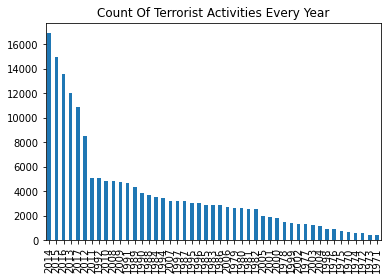

In [ ]:
data['iyear'].value_counts().plot(kind='bar')
plt.title('Count Of Terrorist Activities Every Year')

Text(0.5, 1.0, 'Count Of Terrorist Activities Every Year')

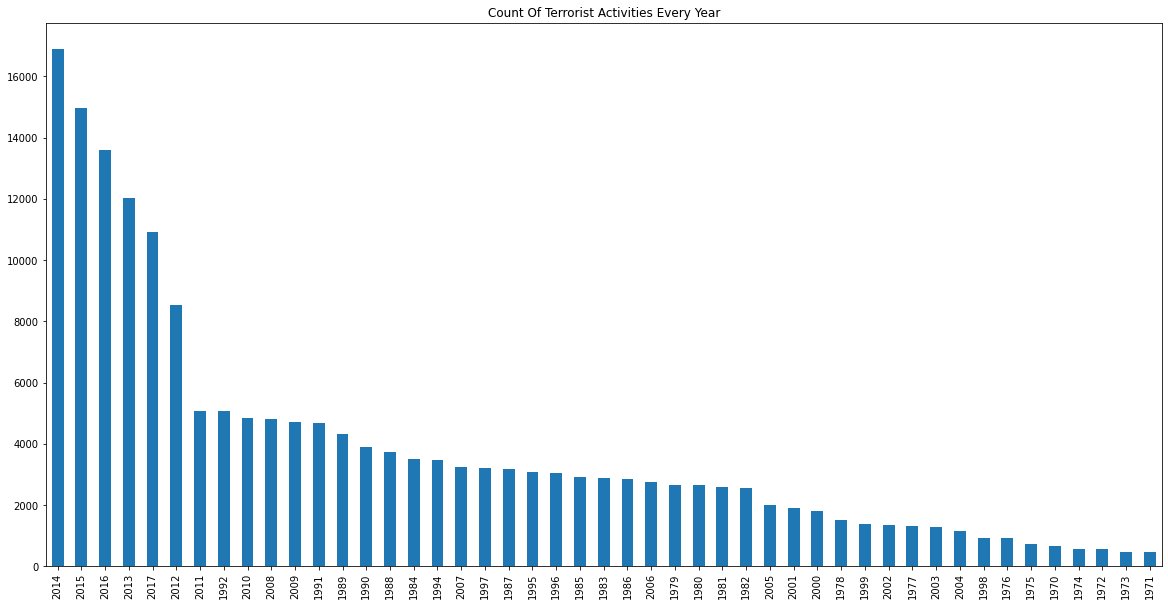

In [ ]:
data['iyear'].value_counts().plot(kind='bar',figsize=(20,10))
plt.title('Count Of Terrorist Activities Every Year')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


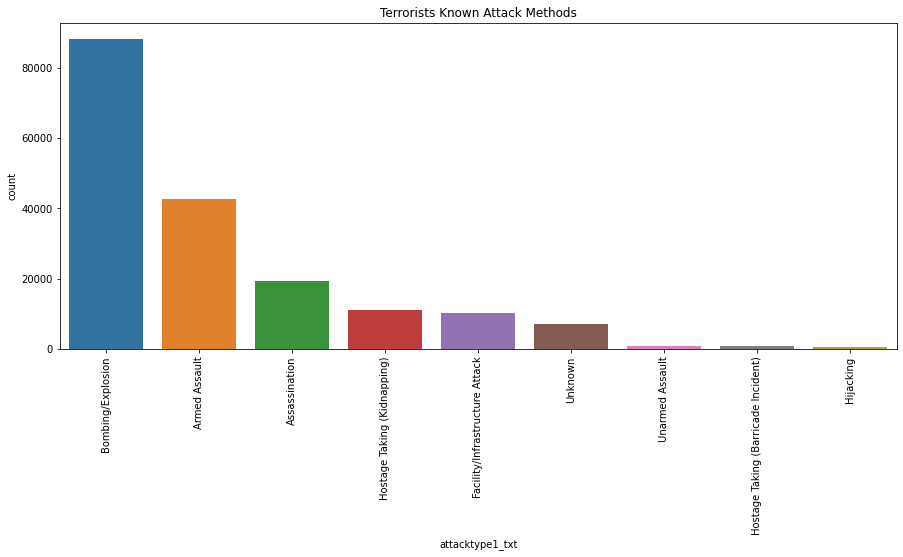

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('attacktype1_txt',data=data,order=data['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorists Known Attack Methods')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


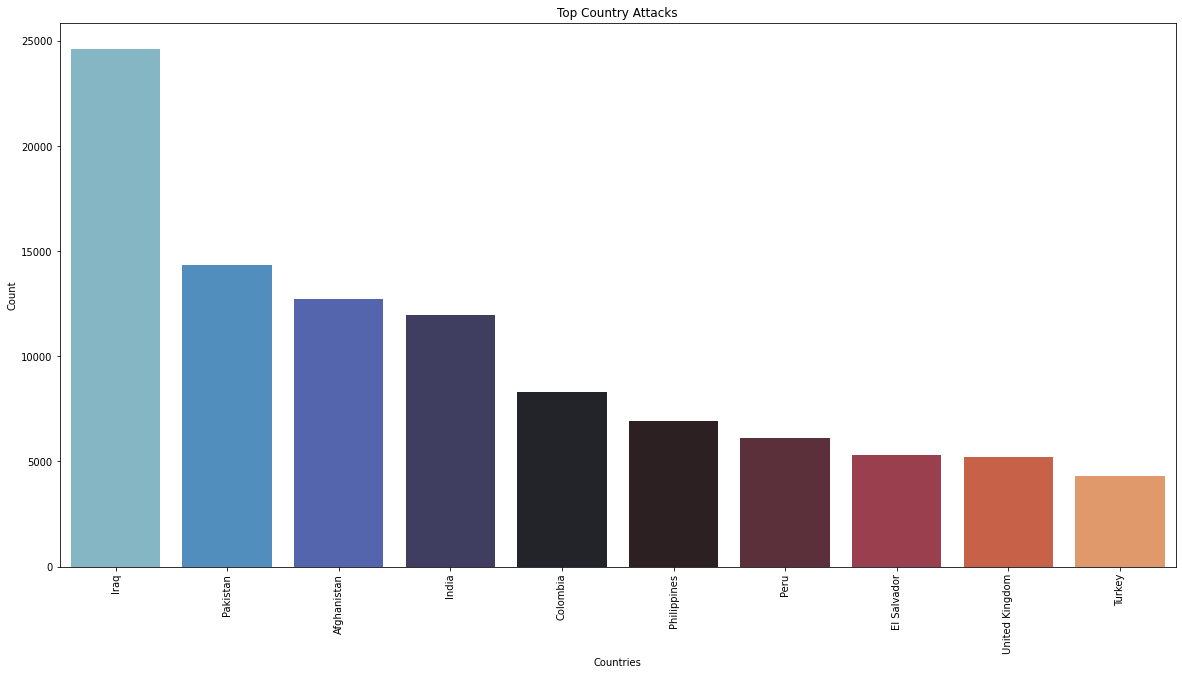

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(data['country_txt'].value_counts()[:10].index,data['country_txt'].value_counts()[:10].values, palette="icefire")
plt.title('Top Country Attacks')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data.isna().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


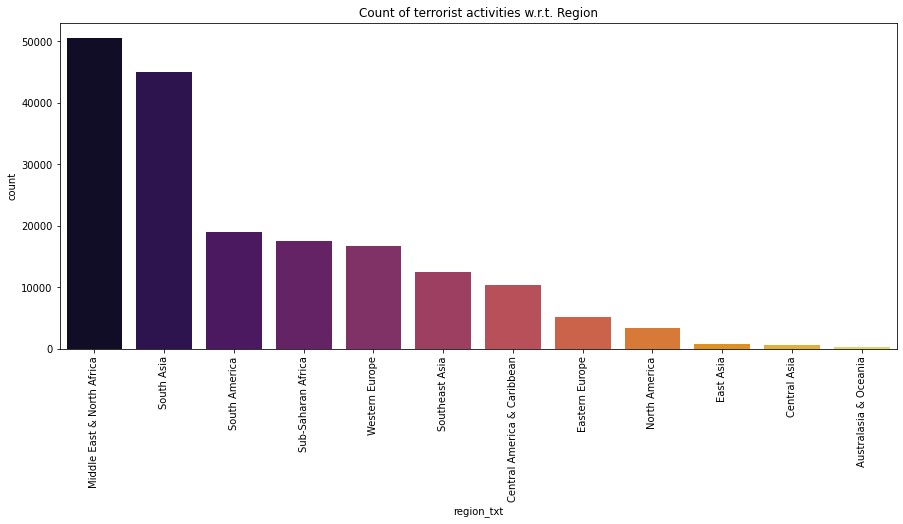

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('region_txt',data=data, palette='inferno',order=data['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count of terrorist activities w.r.t. Region')
plt.show()

Text(0.5, 1.0, 'Most used Targets')

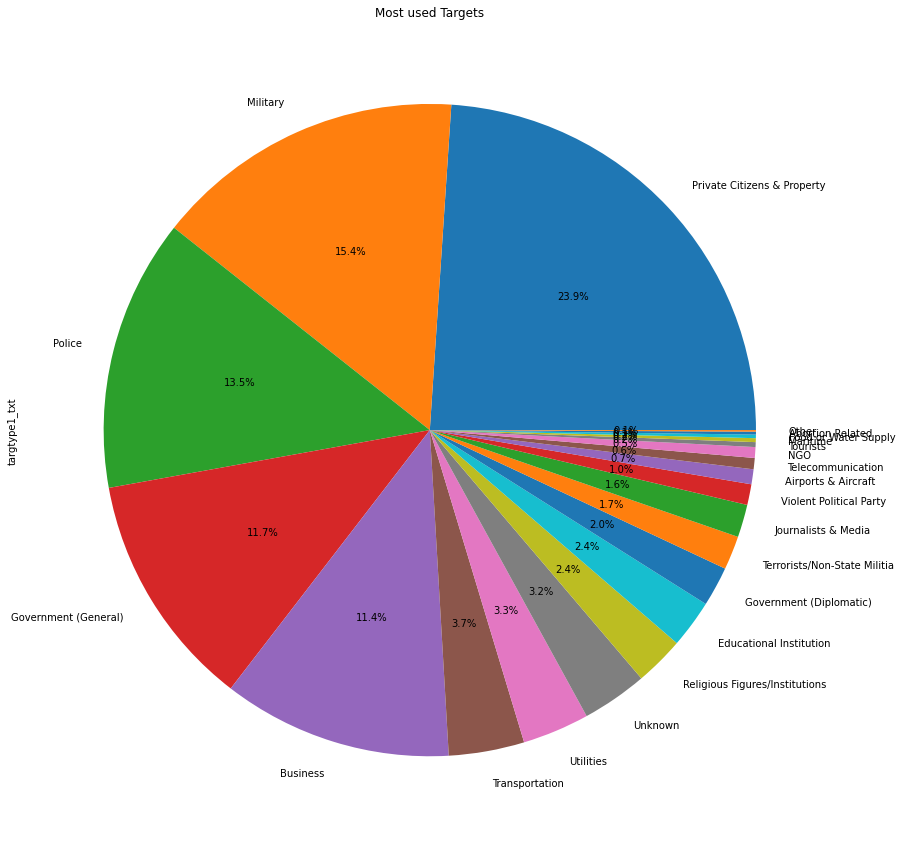

In [ ]:
data['targtype1_txt'].value_counts().plot(kind='pie',figsize=[20,15],autopct='%1.1f%%')
plt.title("Most used Targets")

In [ ]:
data.isna().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

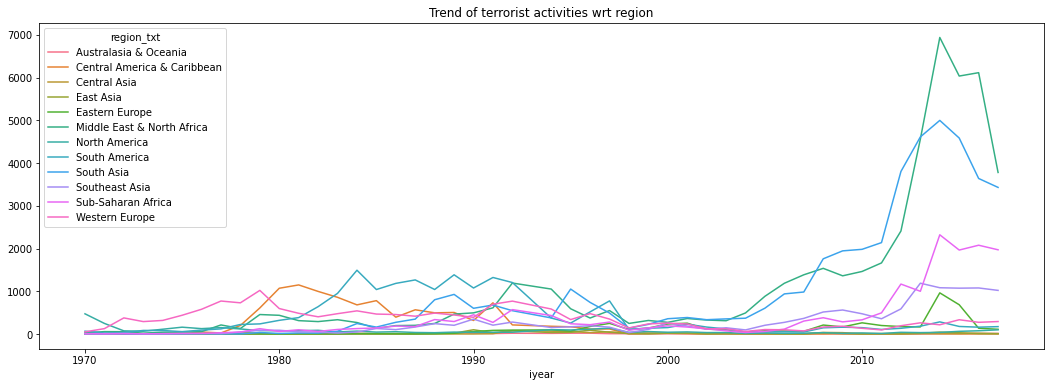

In [ ]:
terror_region=pd.crosstab(data.iyear,data.region_txt)
terror_region.plot(color=sns.color_palette('husl',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Trend of terrorist activities wrt region")
plt.show()

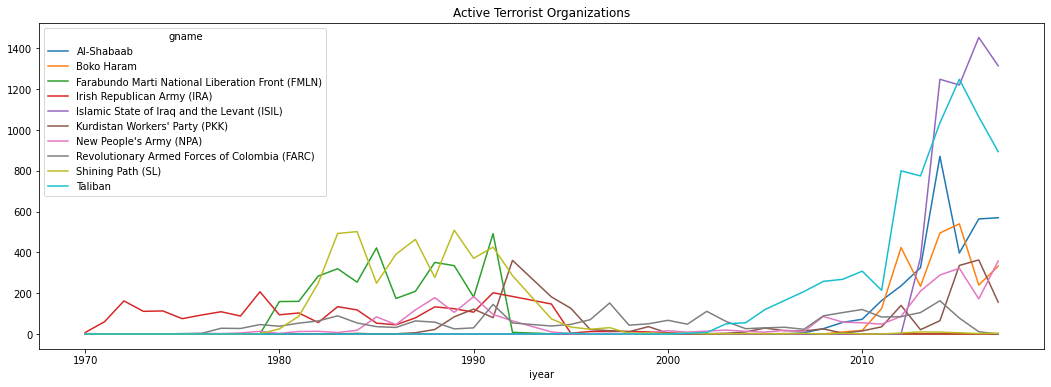

In [ ]:
top_groups10=data[data['gname'].isin(data['gname'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.iyear,top_groups10.gname).plot(color=sns.color_palette('tab10',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Active Terrorist Organizations")
plt.show()

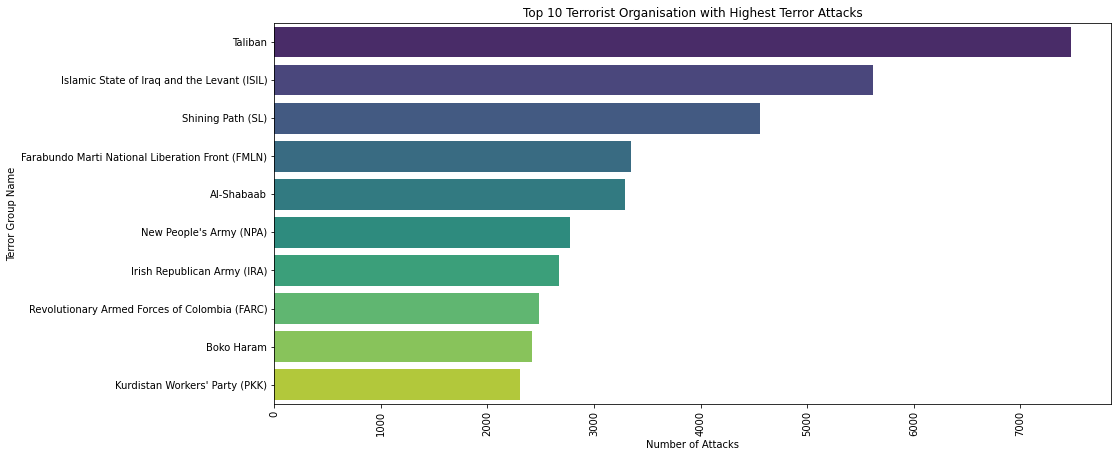

In [ ]:
plt.figure(figsize = (15,7))
sns.barplot(x = data['gname'].value_counts()[1:11].values, y = data['gname'].value_counts()[1:11].index,palette='viridis')
plt.title('Top 10 Terrorist Organisation with Highest Terror Attacks')
plt.ylabel('Terror Group Name')
plt.xlabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

In [ ]:
data.isna().sum()


eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


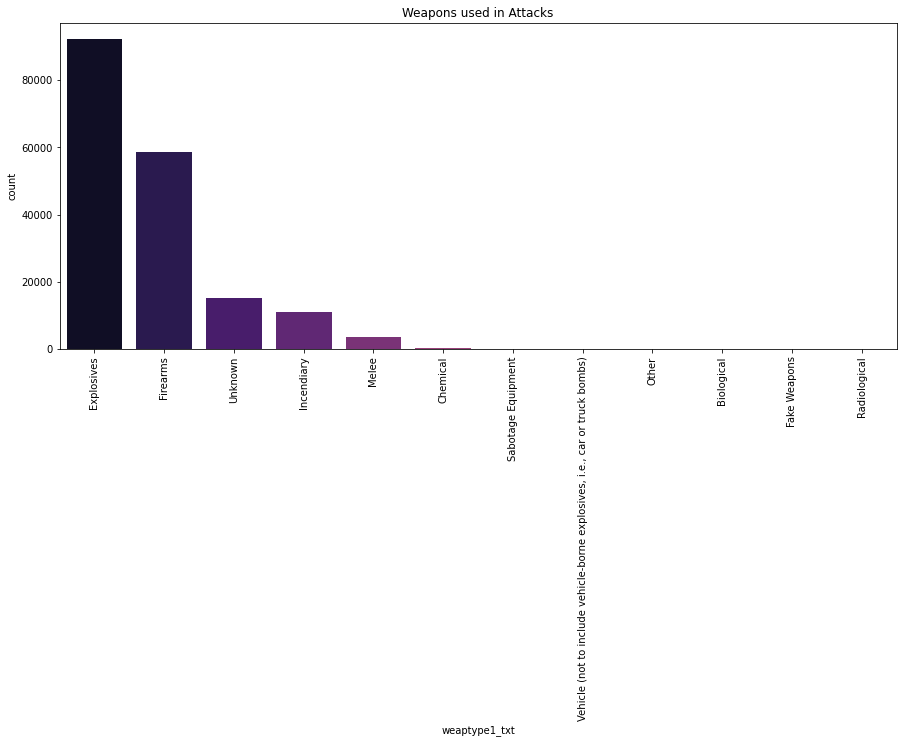

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('weaptype1_txt',data=data, palette='magma',order=data['weaptype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Weapons used in Attacks')
plt.show()

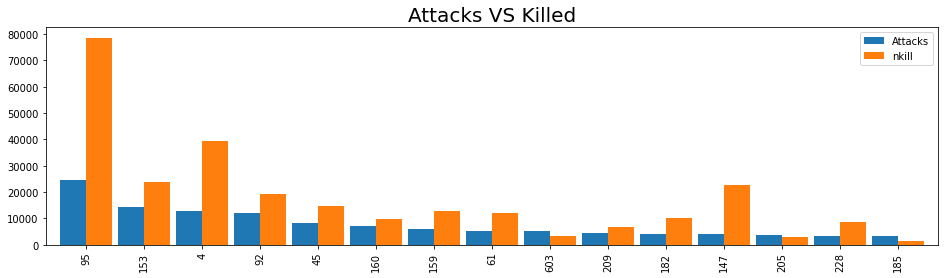

In [ ]:
count_terror = data['country'].value_counts()[:15].to_frame()
count_terror.columns=['Attacks']
count_kill=data.groupby ('country')['nkill'].sum().to_frame()
count_terror.merge(count_kill,left_index = True,right_index =True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
plt.title("Attacks VS Killed", fontsize=20)
fig.set_size_inches(16,4)
plt.show()

In [ ]:
data.isna().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

In [ ]:
print("Conclusion")
print("Country with most attacks: ",data["country"].value_counts().idxmax())
print("City with most attacks: ",data["city"].value_counts().index[1])
print("Region with most attacks: ",data["region_txt"].value_counts().idxmax())
print("Year with most attacks: ",data["iyear"].value_counts().idxmax())
print("Month with most attacks: ",data["imonth"].value_counts().idxmax())
print("Group with most attacks: ",data["gname"].value_counts().index[1])
print("Most Attack Types: ",data["attacktype1_txt"].value_counts().idxmax())

Conclusion
Country with most attacks:  95
City with most attacks:  Baghdad
Region with most attacks:  Middle East & North Africa
Year with most attacks:  2014
Month with most attacks:  5
Group with most attacks:  Taliban
Most Attack Types:  Bombing/Explosion
